<a href="https://colab.research.google.com/github/leynessa/ds_projects/blob/main/heart_disease_prognosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Heart Disease Prediction using Machine Learning**

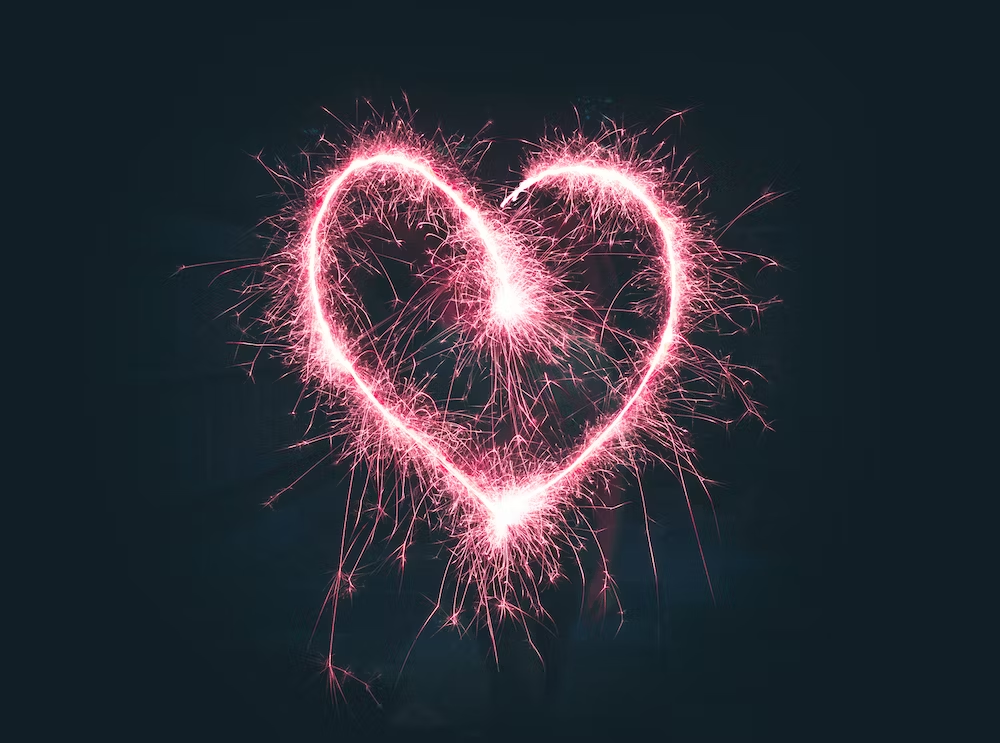

##**Introduction**



Project Objective: Predicting absence or presence of heart disease in patients based on features given

In the realm of healthcare and medical research, the potential for data-driven insights has become increasingly evident, offering opportunities to enhance diagnostic accuracy and patient care. This data science project aims to dive into the realm of cardiovascular health by harnessing the power of machine learning. The focal point of this investigation is a comprehensive dataset that houses a plethora of attributes pertaining to heart health, enabling the exploration of predictive models for identifying the presence or absence of heart disease in patients.


Within this extensive dataset lies a treasure trove of information, comprising a total of 76 attributes. However, the focus of prior research has centered on a curated subset of 14 attributes. The crux of the matter lies in the "goal" field, which denotes the presence of heart disease in patients.

Furthermore, privacy considerations have not been overlooked in this endeavor. The dataset has undergone anonymization, with patient identifiers such as names and social security numbers being replaced by dummy values. This meticulous attention to privacy ensures that the project adheres to ethical and legal standards while enabling rigorous analysis.
 origin: https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction?select=Heart_Disease_Prediction.csv

The subsequent sections of this project will dive into data preprocessing, feature selection, exploratory data analysis, model development, evaluation, and interpretation. By leveraging the power of machine learning techniques, we endeavor to construct predictive models that can aid healthcare professionals in making informed decisions and ultimately contribute to the betterment of patient outcomes in the realm of cardiovascular health.

###**Keys and definition of the features chosen:**

•	Age- age in years

•	Sex -  gender
    1 = male
    0 = female

•	Chest pain type :  

    Value 1: typical angina
    Value 2: atypical angina
    Value 3: non-anginal pain
    Value 4: asymptomatic

•	BP -  systolic blood pressure in mm Hg


•	Cholesterol - serum cholesterol in mg/dl


•	FBS over 120 - fasting blood sugar > 120 mg/dl:

    --1 = true
    --0 = false


•	EKG results - number of EKG readings

•	Max HR - maximum heart rate achieved

•	Exercise angina -  exercise induced angina

    1 = yes
    0 = no

•	ST depression- ST depression induced by exercise relative to rest

•	Slope of ST -  the slope of the peak exercise ST segment
    
    -- Value 1: upsloping
    -- Value 2: flat
    -- Value 3: downsloping
•	Number of vessels fluro: the number of vessels detected by colored fluoroscopy.  fluoroscopy detected coronary artery calcification

•	Thallium - A thallium stress test is an imaging test that indicates how well blood flows into your heart while you’re exercising or at rest.

    --Value 3: normal
    --Value 6: fixed defect
    --Value 7: reversable defect

•	Heart Disease: diagnosis of heart disease if it was absent or present


##**Limitations of the Dataset**

1. only systolic BP
2. When was the EKG reading taken

##**The Problem Statement**
Determine if heart disease is present or absent in a patient

# **Exploratory Data Analysis(EDA)**


In [93]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix,  f1_score

#read csv
df= pd.read_csv("Heart_Disease_Prediction.csv")
df.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [74]:
df.shape


(270, 14)

In [75]:
df.columns # see the features of the dataset

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [8]:
print(df['Heart Disease'].unique().tolist())

['Presence', 'Absence']


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

The values are integers and floats except the target values which is an object

In [77]:
print(df.isnull().sum())

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


<Axes: >

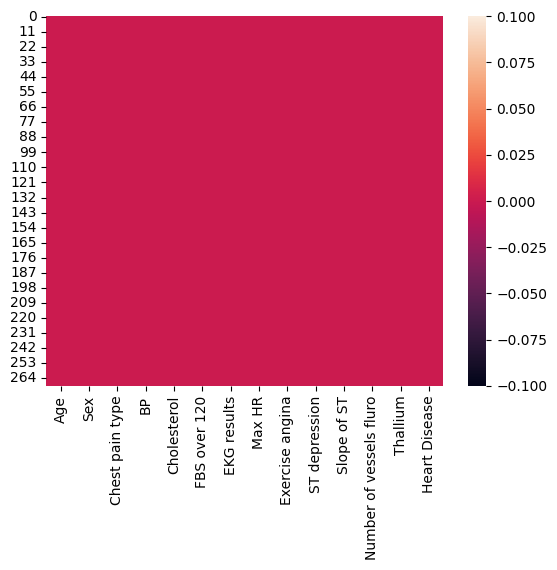

In [11]:
sns.heatmap(df.isnull()) #show where ther are no missing values

In [12]:
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

Based on the info table, isnull, isna functions, there are no missing values or no NaN values

In [13]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [14]:
df['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

<Axes: >

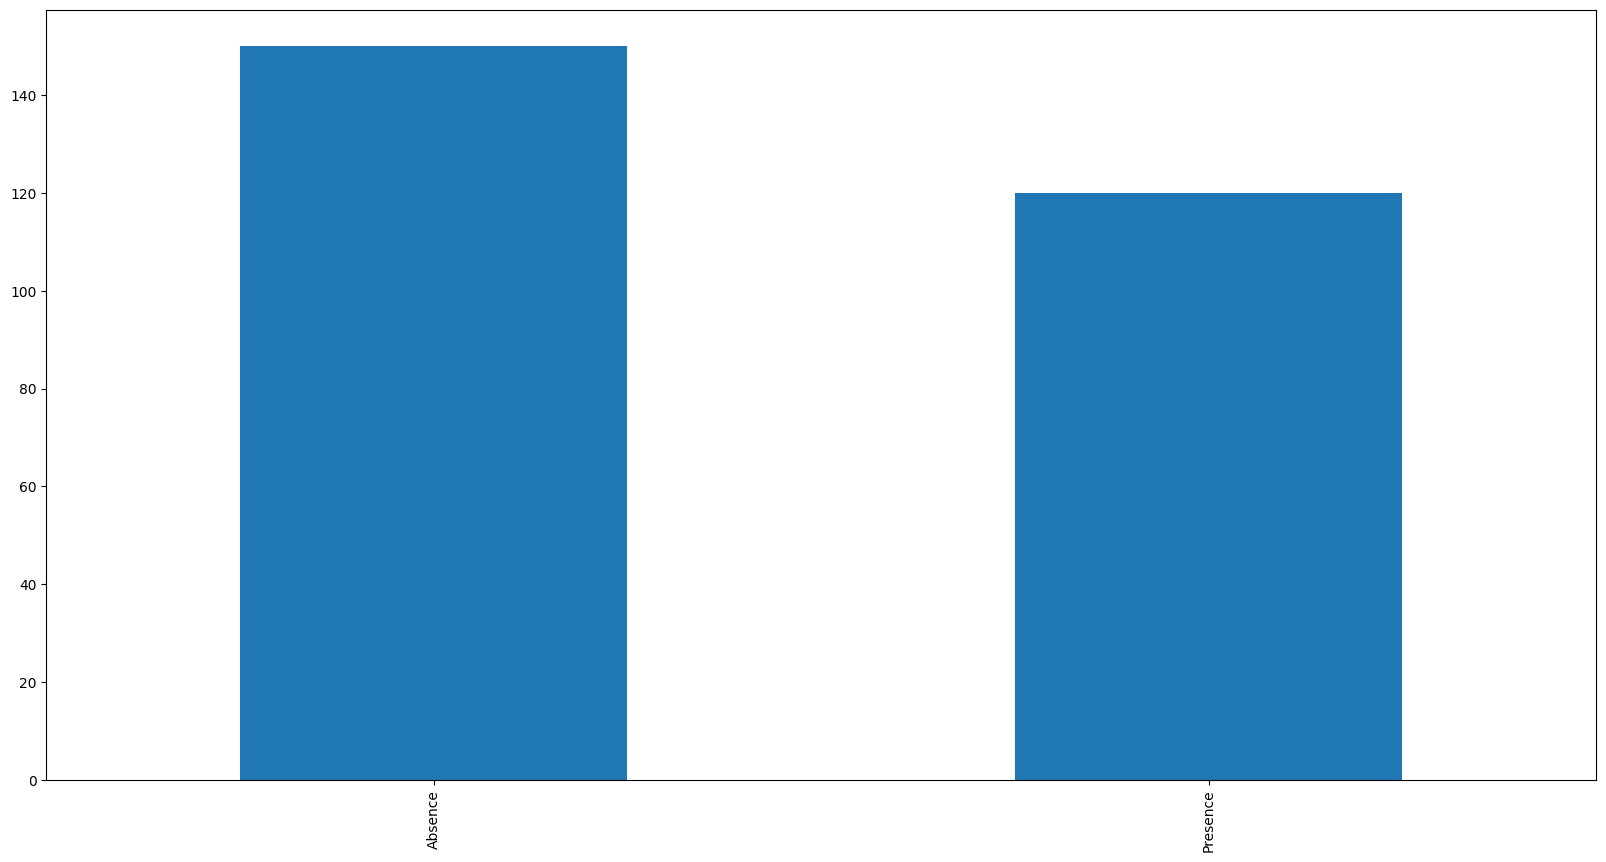

In [15]:
df['Heart Disease'].value_counts().plot(kind='bar', figsize=(20,10))

The Target values are relatively balanced

lets check if the there are any big differences between gengers

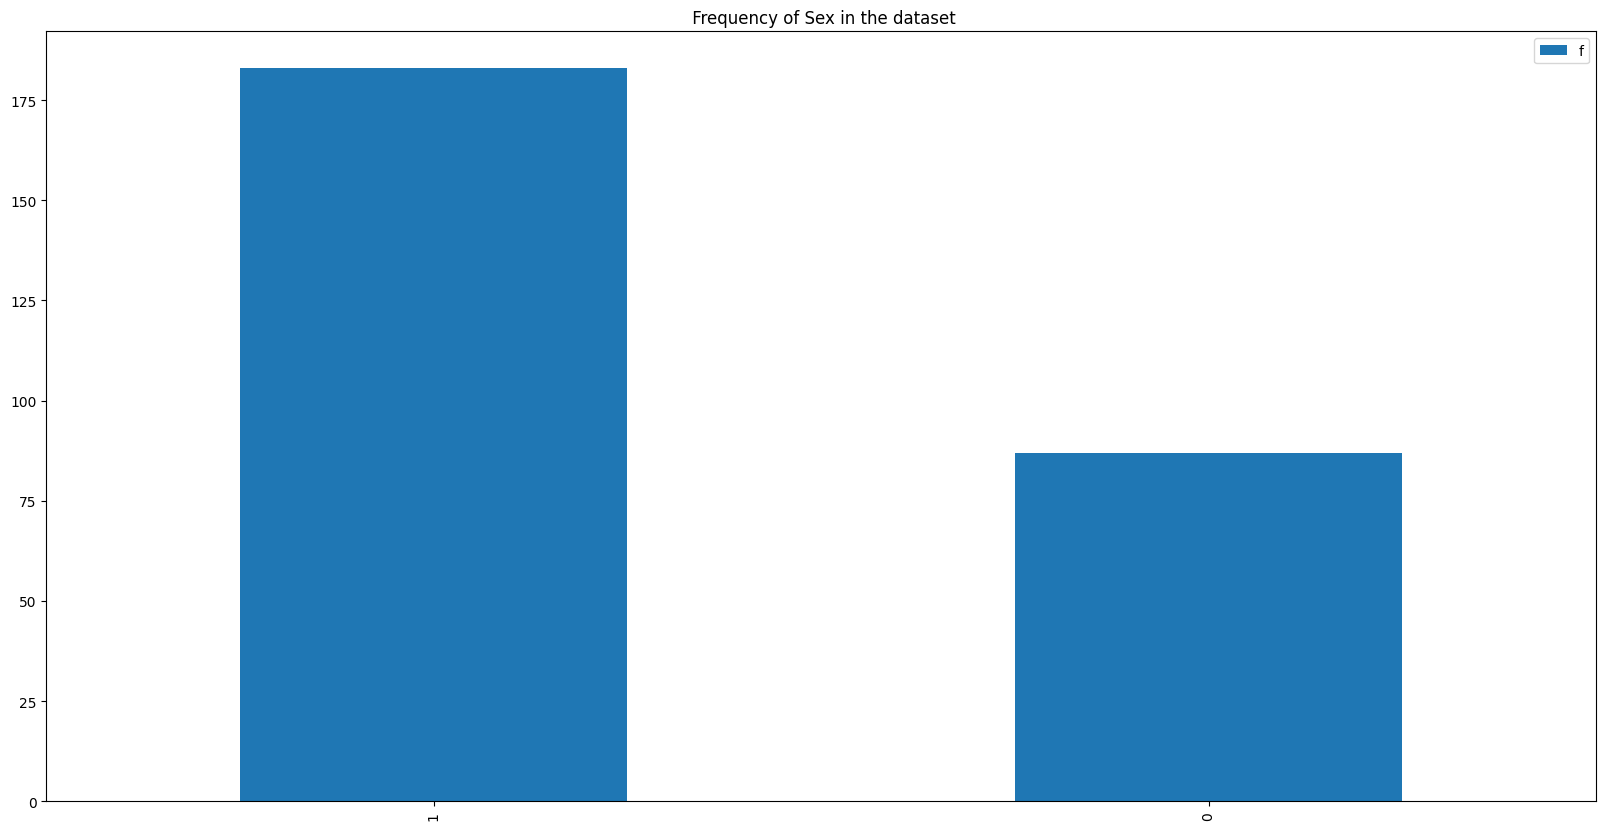

In [25]:
df.Sex.value_counts().plot(kind='bar', figsize=(20,10)) #female =0 and Male = 1
plt.title(" Frequency of Sex in the dataset")
plt.legend("female =0 and Male = 1")

**How does Sex relate to the frequency of heart disease**

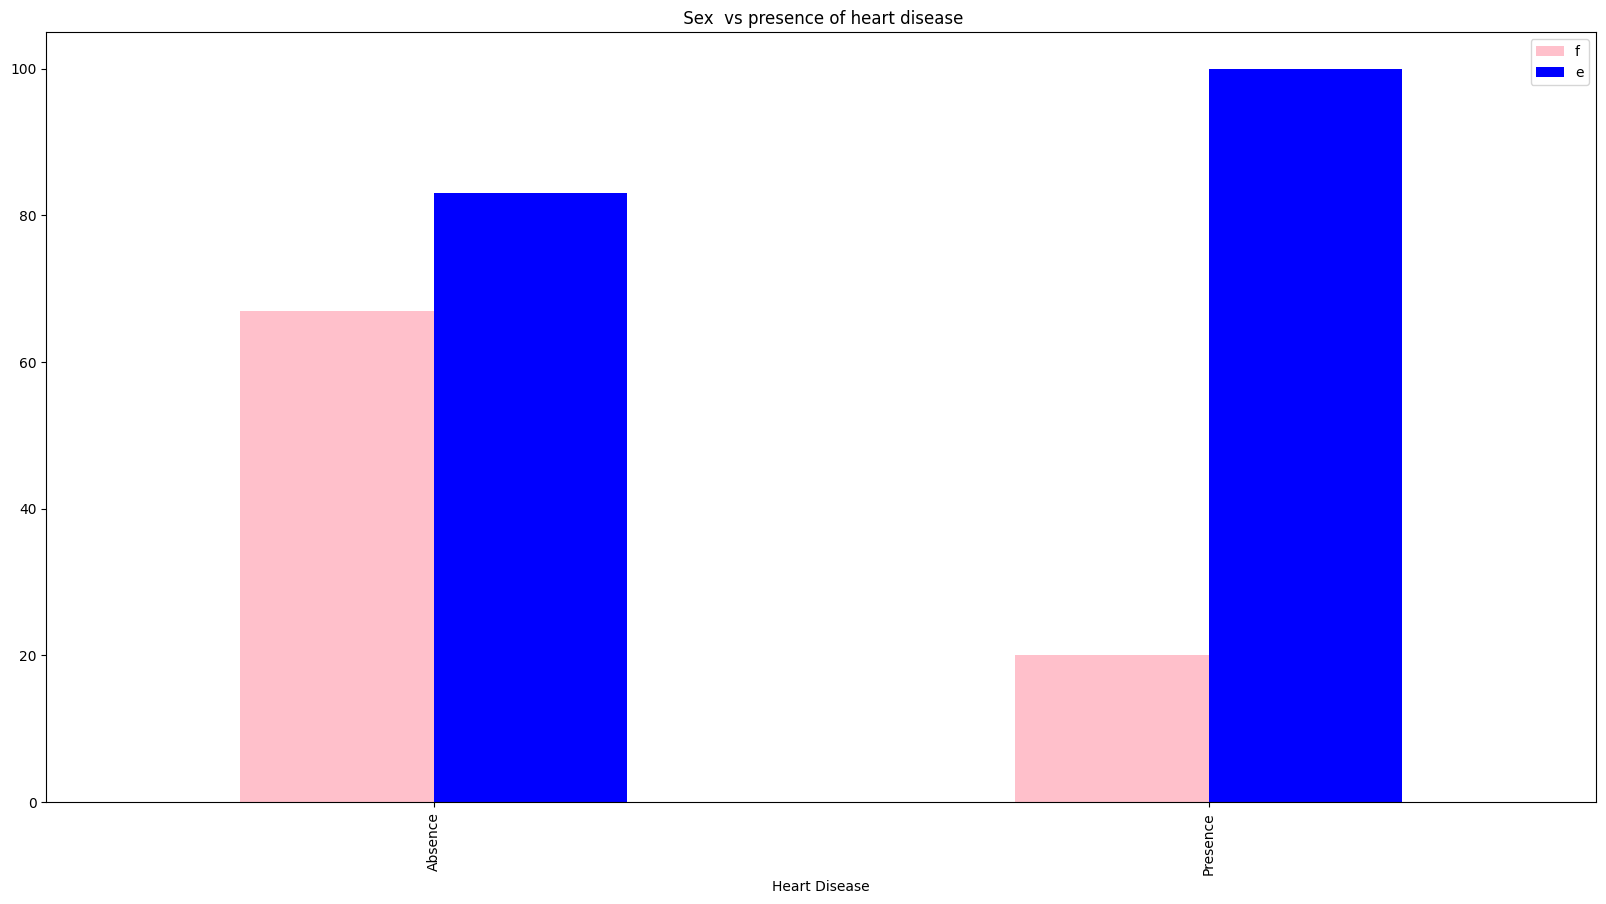

In [27]:

pd.crosstab(df['Heart Disease'], df.Sex).plot(kind = 'bar', figsize=(20,10), color=['pink', 'blue'])
pd.crosstab(df['Heart Disease'], df.Sex)
plt.title(" Sex  vs presence of heart disease")
plt.legend("female =0 and Male = 1")

Compare Age Vs Max HR and presence of Heart Disease

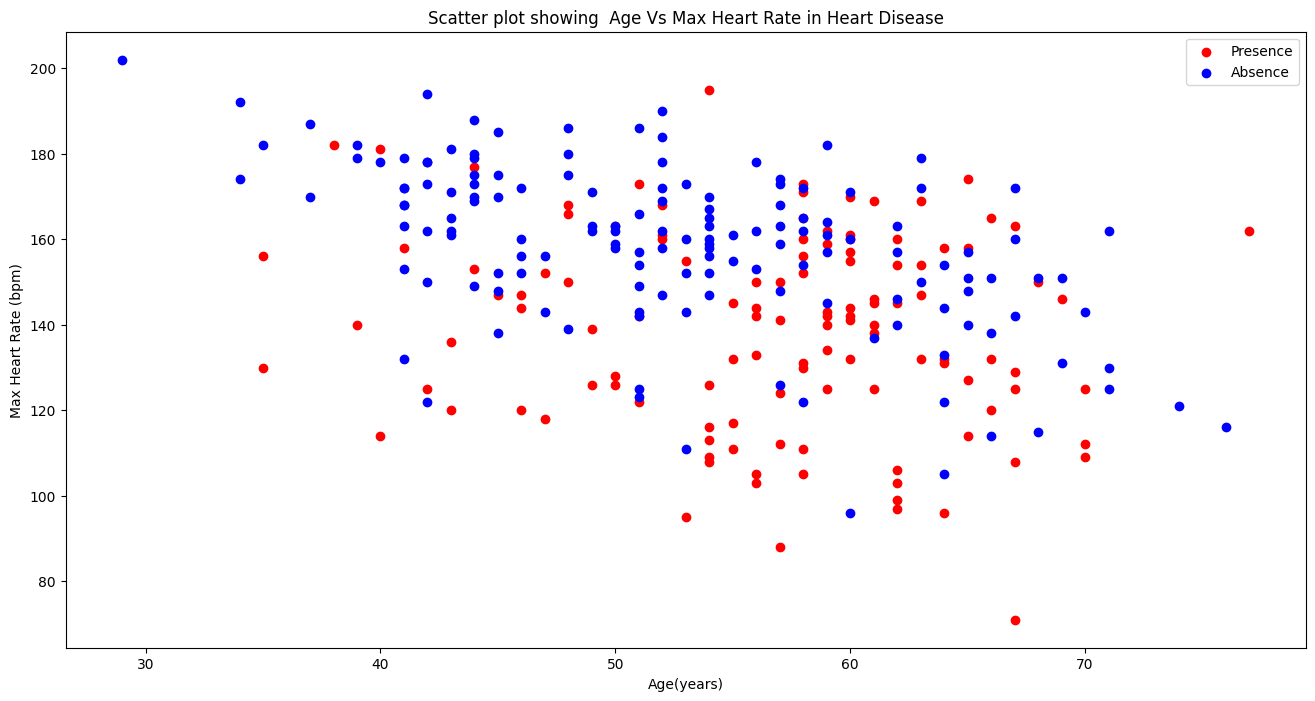

In [52]:

plt.figure(figsize=(16, 8))
plt.scatter(df.Age[df["Heart Disease"]=='Presence'],
            df["Max HR"][df["Heart Disease"]=='Presence'], c= 'red' ) #show a scatter plot age vs heart rate, where heart disease is present
plt.title("Scatter plot showing  Age Vs Max Heart Rate in Heart Disease")


plt.scatter(df.Age[df["Heart Disease"]=='Absence'],
            df["Max HR"][df["Heart Disease"]=='Absence'], c= 'blue' ) #show a scatter plot age vs heart rate, where heart disease is present
plt.xlabel("Age(years)")
plt.ylabel("Max Heart Rate (bpm)")
plt.legend(["Presence", "Absence" ])

so there are more males in the dataset than females

<ipython-input-53-263b10278a62>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(bins=50, ax=ax)


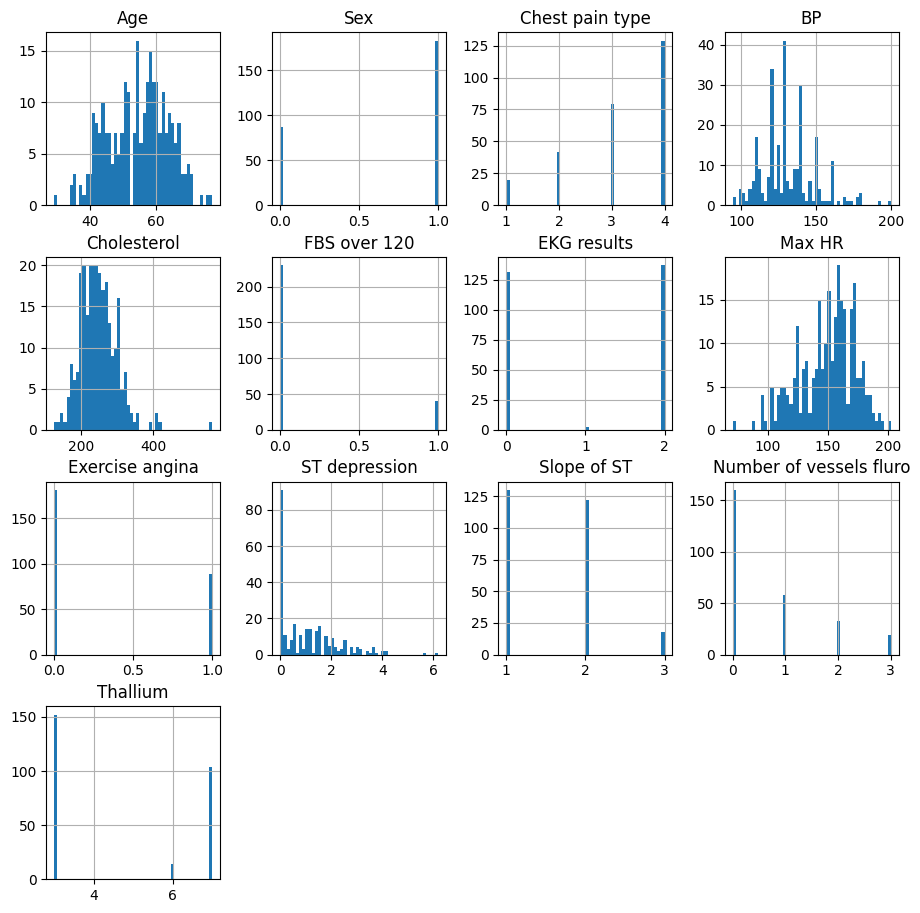

In [53]:
fig, ax = plt.subplots(figsize = (11,11))
df.hist(bins=50, ax=ax)
plt.show()


Chest pain type,1,2,3,4
Heart Disease,,,,
Absence,15,35,62,38
Presence,5,7,17,91


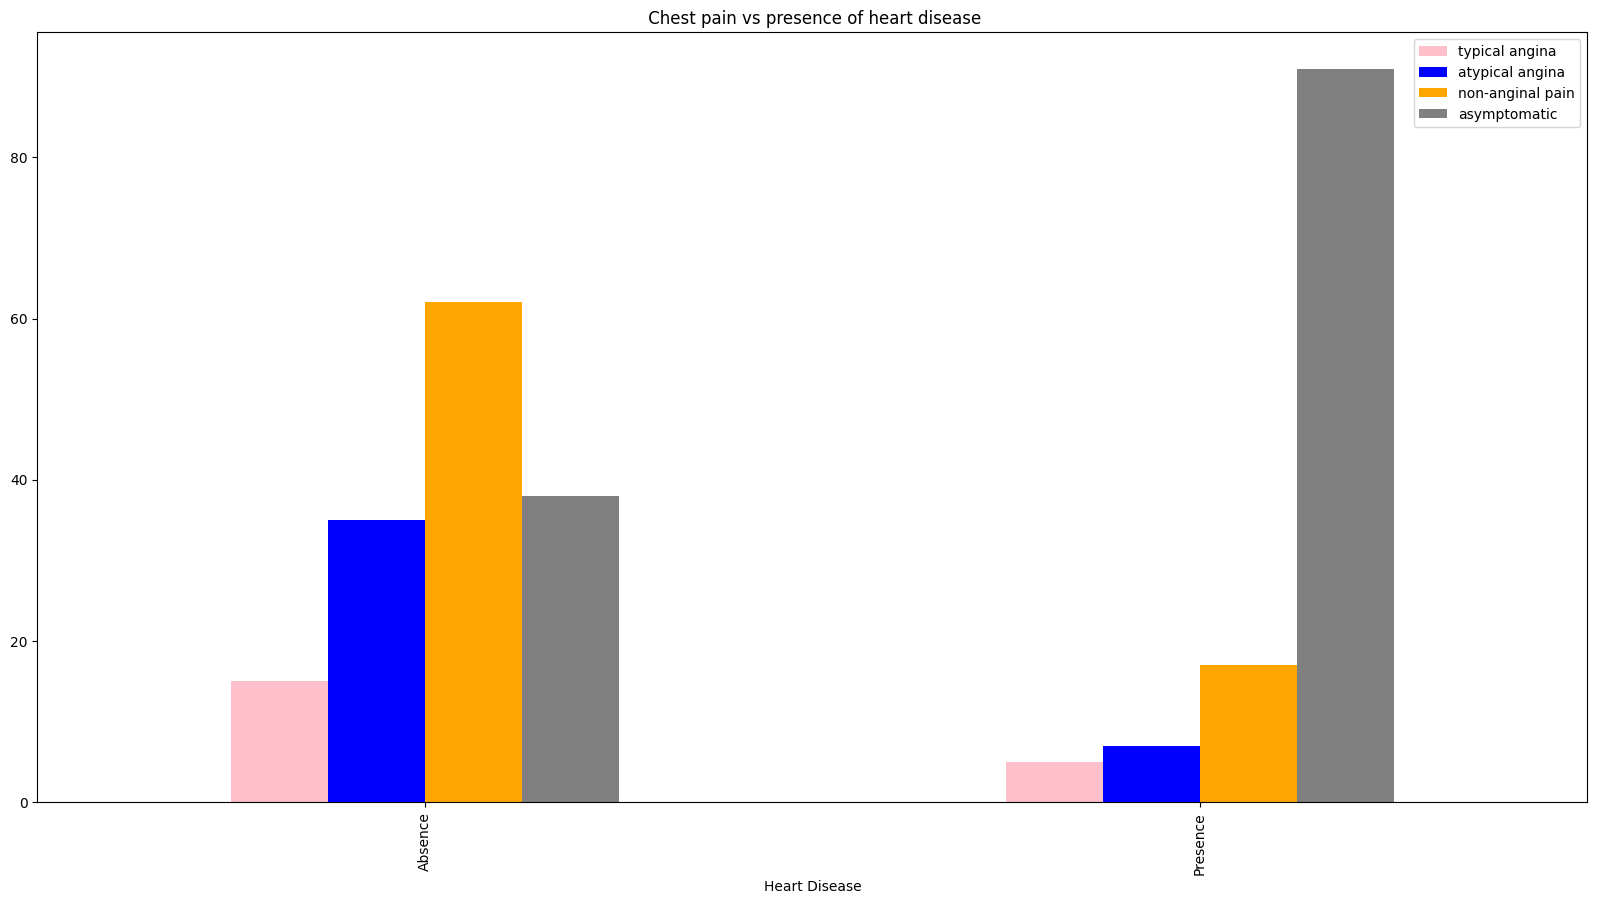

In [58]:
#Heart frequency in Chest pain

pd.crosstab(df['Heart Disease'], df['Chest pain type']).plot(kind = 'bar', figsize=(20,10), color=['pink', 'blue', 'orange', 'gray'])
pd.crosstab(df['Heart Disease'], df['Chest pain type'])
plt.title(" Chest pain vs presence of heart disease")
plt.legend( ['typical angina', 'atypical angina', 'non-anginal pain',  'asymptomatic'])
pd.crosstab(df['Heart Disease'], df['Chest pain type'])

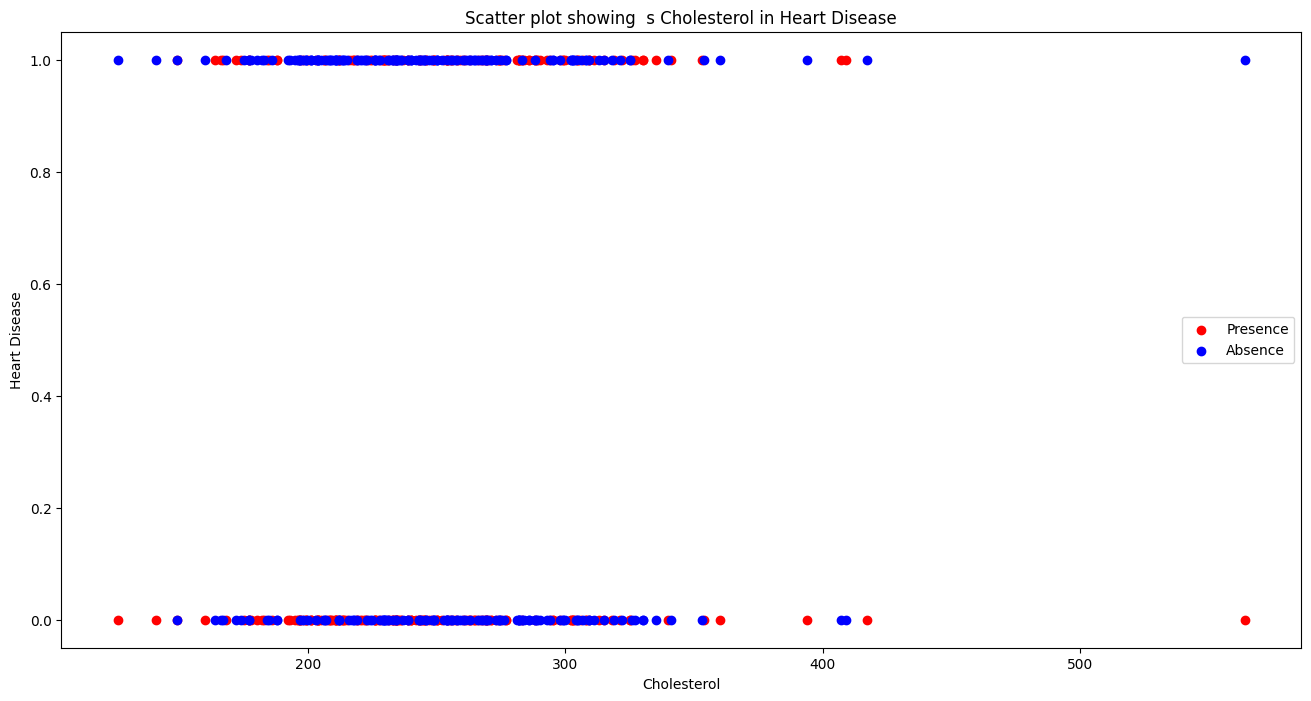

In [86]:
plt.figure(figsize=(16, 8))
plt.scatter(df["Cholesterol"],[df["Heart Disease"]=='Presence'], c= 'red' )
plt.title("Scatter plot showing  s Cholesterol in Heart Disease")


plt.scatter(df["Cholesterol"],[df["Heart Disease"]=='Absence'], c= 'blue' )
plt.xlabel("Cholesterol")
plt.ylabel("Heart Disease")
plt.legend(["Presence", "Absence" ])

In [94]:
 #One-hot encode
cols = ['Heart Disease']

for col in cols:
    df= pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    df.drop([col], axis=1, inplace=True)
    df.drop(["Heart Disease_Absence"], axis=1, inplace=True)

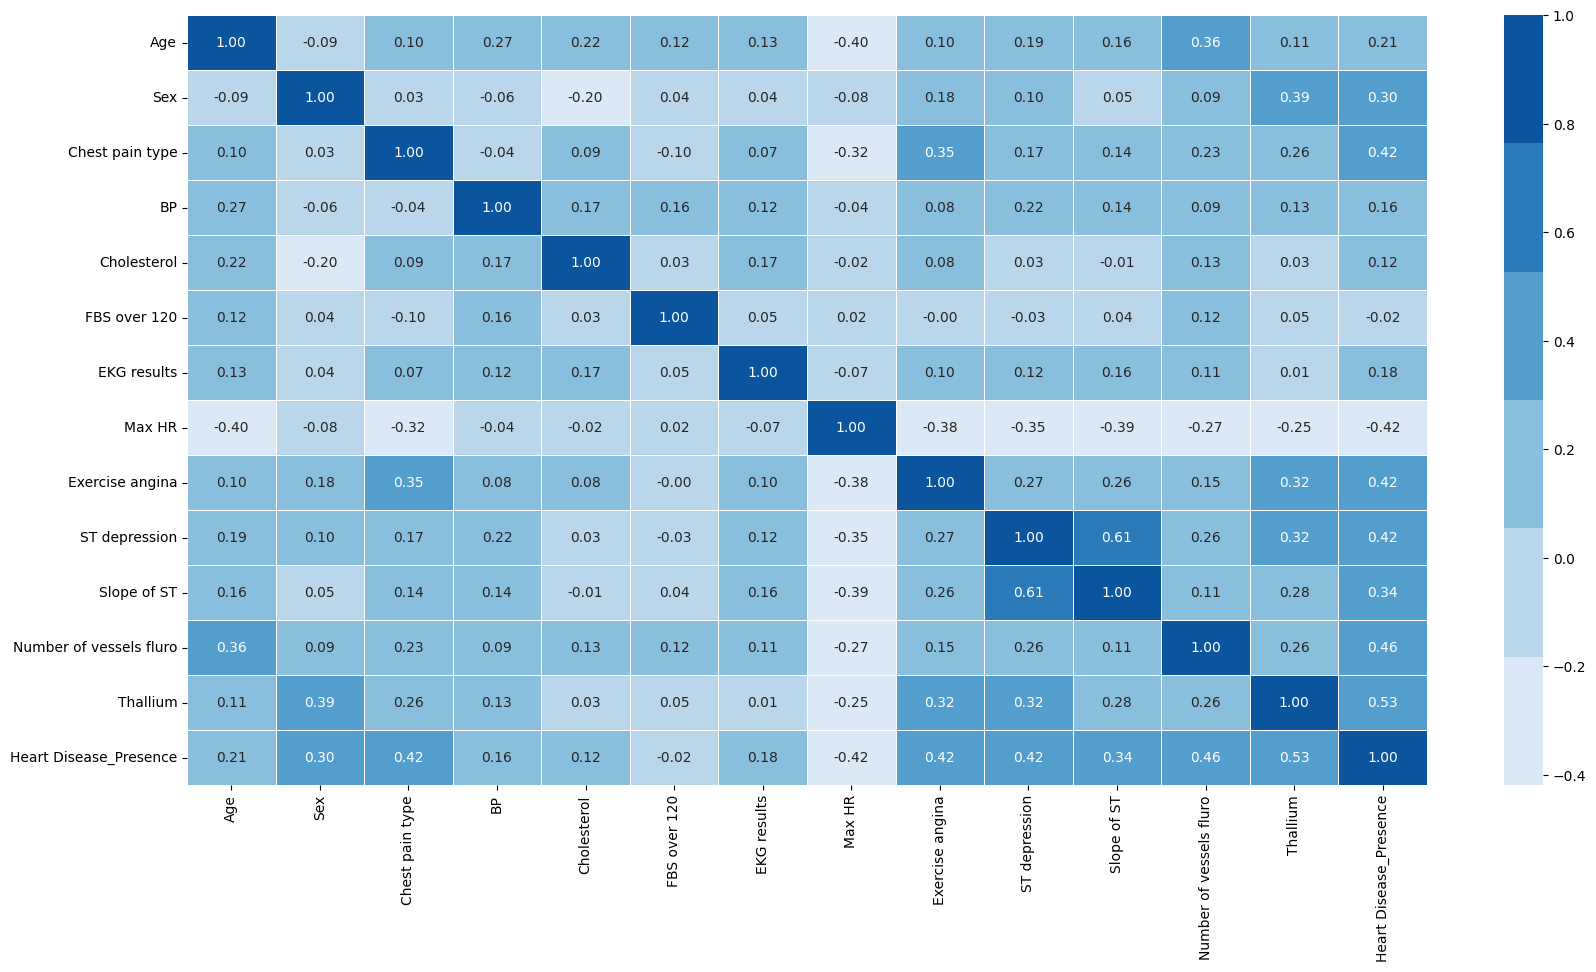

In [95]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize= (20, 10))
colormap = sns.color_palette("Blues")
ax = sns.heatmap(corr_matrix, annot =  True, linewidths= 0.5, fmt='.2f', cmap = colormap)

In [96]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease_Presence
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0



based on the histogram yu can see that some values are categorical

lets see each individual syptom and how it relates to the target

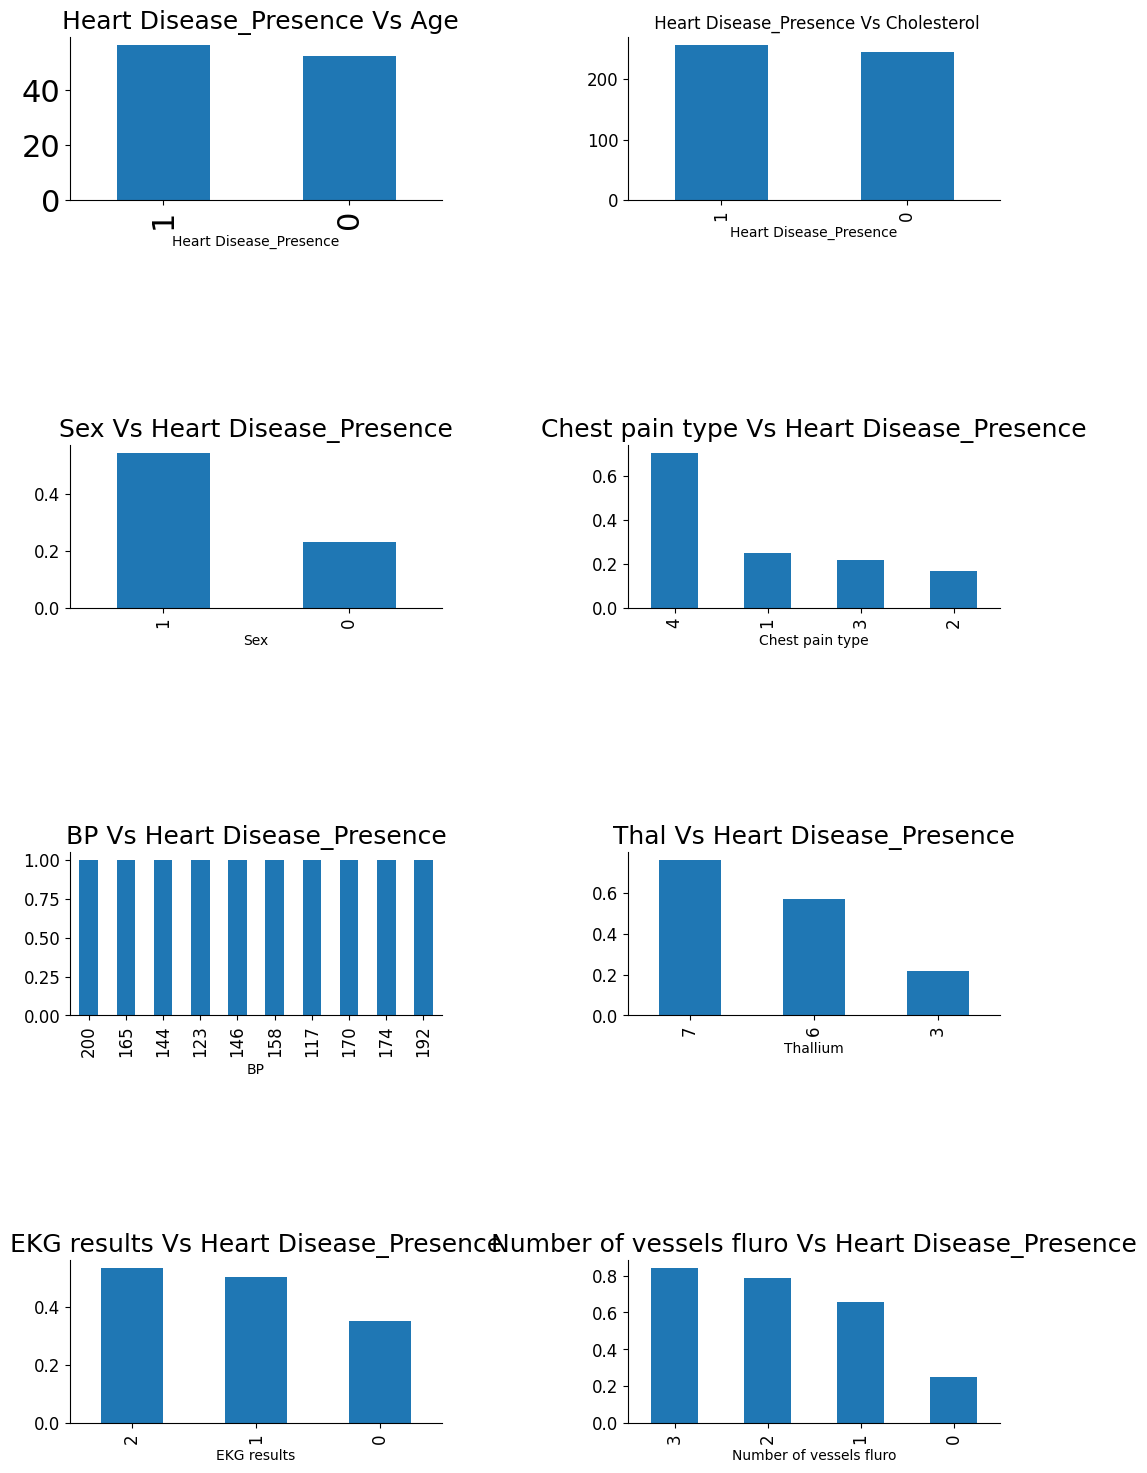

In [97]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
df.groupby('Heart Disease_Presence')['Age'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=22)
axarr[0][0].set_title(" Heart Disease_Presence Vs Age", fontsize=18)
df.groupby('Heart Disease_Presence')['Cholesterol'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title(" Heart Disease_Presence Vs Cholesterol", fontsize=12)
df.groupby('Sex')['Heart Disease_Presence'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Sex Vs Heart Disease_Presence", fontsize=18)
df.groupby('Chest pain type')['Heart Disease_Presence'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Chest pain type Vs Heart Disease_Presence", fontsize=18)
df.groupby('BP')['Heart Disease_Presence'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("BP Vs Heart Disease_Presence", fontsize=18)
df.groupby('Thallium')['Heart Disease_Presence'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Thal Vs Heart Disease_Presence", fontsize=18)
df.groupby('EKG results')['Heart Disease_Presence'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("EKG results Vs Heart Disease_Presence", fontsize=18)

df.groupby('Number of vessels fluro')['Heart Disease_Presence'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Number of vessels fluro Vs Heart Disease_Presence", fontsize=18)

plt.subplots_adjust(hspace=1.5)
plt.subplots_adjust(wspace=0.5)
sns.despine()

Observations:

#**Preprocessing**

Preprocessing is a crucial step in preparing the data for machine learning or data analysis tasks. It involves various techniques to ensure that the data is in a suitable format for modeling.

##**Delete column**
the feature 'Heart Disease_Absence' will be deleted to prevent multiple collinearity

In [ ]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'Heart Disease_Absence', 'Heart Disease_Presence'],
      dtype='object')

In [ ]:
df_train = df.drop(['Heart Disease_Absence'], axis = 1)
df_train.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease_Presence
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


##**Seperate the dataframe into x and y**

In [ ]:

#seperate the dataframe into x and y
x= df_train.values #x has all the values
y = df_train['Heart Disease_Presence'].values # this is the target variable

In [ ]:
df_train.columns.get_loc('Heart Disease_Presence')

13

In [ ]:

#delete the Heart disease_Presence column from X
X=np.delete(x,13,axis=1)

array([[70.,  1.,  4., ...,  3.,  3.,  1.],
       [67.,  0.,  3., ...,  0.,  7.,  0.],
       [57.,  1.,  2., ...,  0.,  7.,  1.],
       ...,
       [56.,  0.,  2., ...,  0.,  3.,  0.],
       [57.,  1.,  4., ...,  0.,  6.,  0.],
       [67.,  1.,  4., ...,  3.,  3.,  1.]])

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

##**Feature Scaling**

In [ ]:

from sklearn.preprocessing import StandardScaler
#  Instantiate the StandardScaler
scaler = StandardScaler()

In [ ]:

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#**Model**

##**Decision Tree**


In [ ]:
from sklearn import tree

dt_model = DecisionTreeClassifier( max_depth = 5)

#  Train the model using the scaled training data
dt_model.fit(X_train_scaled, y_train)

#  Make predictions on the scaled test data
y_pred = dt_model.predict(X_test_scaled)

In [ ]:

#hyperparameters selection
# Define the parameter grid with max depth values to search through
param_grid = {'max_depth': [None , 4, 5, 10, 15, 20]}
grid_search = GridSearchCV(dt_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
# Get the best max depth from the search results
best_max_depth = grid_search.best_params_['max_depth']
print("Best Max Depth:", best_max_depth)

Best Max Depth: 5


In [ ]:

# Evaluate the model's performance on the test data
accuracy_dt = accuracy_score(y_test, y_pred)
precision_dt = precision_score(y_test, y_pred, average=None)
recall_dt = recall_score(y_test, y_pred, average=None)
f1_dt = f1_score(y_test, y_pred,average="weighted")


NameError: ignored